# DELHIVERY_PROJECT

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
dd=pd.read_csv('delhivery_data.csv')

In [223]:
dd.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [224]:
dd.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [225]:
dd.shape

(144867, 24)

In [226]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [227]:
dd.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [228]:
dd.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [229]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
dd[['source_name','destination_name']]=imputer.fit_transform(dd[['source_name','destination_name']])

In [230]:
dd.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# CONVERT OBJECT TYPE TO DATETIME

In [232]:
dd.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [233]:
dd['trip_creation_time']=pd.to_datetime(dd['trip_creation_time'])
dd['od_start_time']=pd.to_datetime(dd['od_start_time'])
dd['od_end_time']=pd.to_datetime(dd['od_end_time'])

In [234]:
dd.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

# DROPPING IRRELEVENT COLUMNS AS THERE IS NO SIGNIFICANCE IN OUR DATA

In [236]:
dd.drop(['data','route_schedule_uuid','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [237]:
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


# SPLIT AND EXTRACT FEATURES OUT OF THE COLUMN 'DESTINATION_NAME'

In [239]:
dd[['destination','dest_state']]=dd['destination_name'].str.split('(',n=1,expand=True)
dd['dest_state']=dd['dest_state'].str.replace(')',' ',regex=False).str.strip()
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination,dest_state
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat_MotvdDPP_D,Gujarat
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat_MotvdDPP_D,Gujarat
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat_MotvdDPP_D,Gujarat
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Khambhat_MotvdDPP_D,Gujarat
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Khambhat_MotvdDPP_D,Gujarat


In [240]:
dd[['dest_city','dest_place','dest_code']]=dd['destination'].str.split('_',n=2,expand=True)
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination,dest_state,dest_city,dest_place,dest_code
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.0,11.9653,14.0,11.0,11.9653,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,20.0,21.7243,10.0,9.0,9.7590,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,28.0,32.5395,16.0,7.0,10.8152,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,45.5620,21.0,12.0,13.0224,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,44.0,54.2181,6.0,5.0,3.9153,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D


In [241]:
dd[['source_name','source_state']]=dd['source_name'].str.split('(',n=1,expand=True)
dd['source_state']=dd['source_state'].str.replace(')',' ',regex=False).str.strip()
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination,dest_state,dest_city,dest_place,dest_code,source_state
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.9653,14.0,11.0,11.9653,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,21.7243,10.0,9.0,9.7590,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,32.5395,16.0,7.0,10.8152,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,45.5620,21.0,12.0,13.0224,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,54.2181,6.0,5.0,3.9153,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat


In [242]:
dd[['name','source_place','source_code']]=dd['source_name'].str.split('_',n=2,expand=True)
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_distance,destination,dest_state,dest_city,dest_place,dest_code,source_state,name,source_place,source_code
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.9653,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,9.7590,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,10.8152,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,13.0224,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,3.9153,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC


In [243]:
dd.drop(['source_name','destination_name'],axis=1,inplace=True)
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,segment_osrm_distance,destination,dest_state,dest_city,dest_place,dest_code,source_state,name,source_place,source_code
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,11.9653,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,9.7590,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,10.8152,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,13.0224,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,3.9153,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC


# EXTRACT FEATURE LIKE MONTH,YEAR,AND DAY FROM 'TRIP CREATION _TIME'

In [245]:
dd['trip_creation_year']=dd['trip_creation_time'].dt.year
dd['trip_creation_month']=dd['trip_creation_time'].dt.month
dd['trip_creation_day']=dd['trip_creation_time'].dt.day
dd.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_city,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20


In [246]:
# most prefered route type for delivery
dd['route_type'].value_counts()

route_type
FTL        99660
Carting    45207
Name: count, dtype: int64

[]

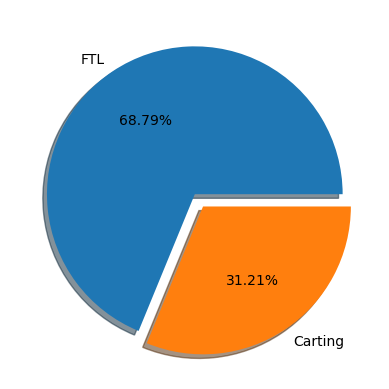

In [247]:
plt.pie(data=dd,x=dd['route_type'].value_counts(),shadow=True,labels=['FTL','Carting'],explode=(0,0.1),autopct='%0.2f%%')
plt.plot()

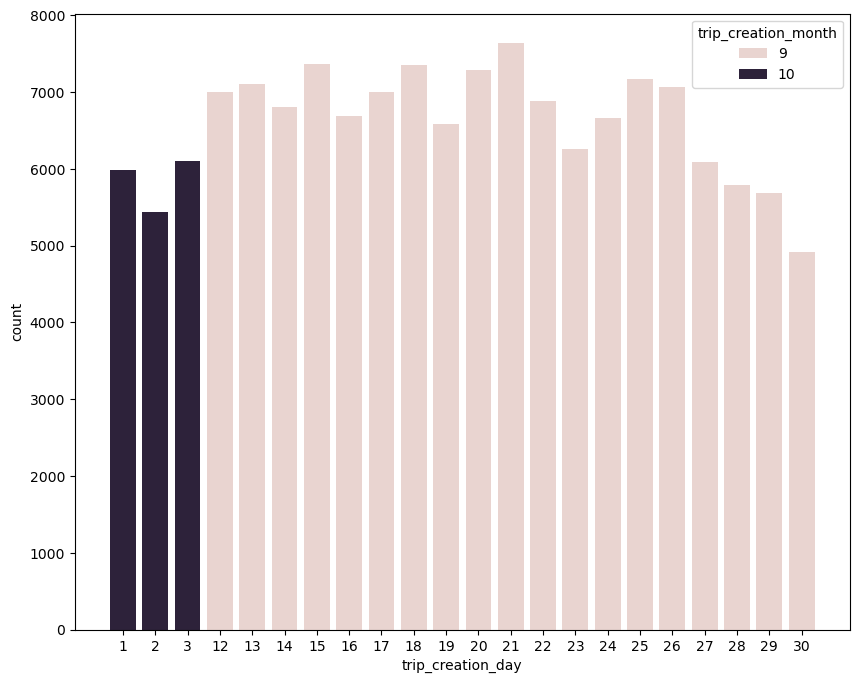

In [248]:
# TRIP CREATION DAY
plt.figure(figsize=(10,8))
sns.countplot(x=dd['trip_creation_day'],hue=dd['trip_creation_month'])
plt.plot()
plt.show()

In [249]:
# which state has most number of deliveries
x=dd.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10)
x

dest_state
Karnataka         21065
Haryana           20883
Maharashtra       18196
West Bengal        8499
Telangana          8205
Tamil Nadu         8058
Uttar Pradesh      7834
Gujarat            6714
Rajasthan          6361
Andhra Pradesh     6265
Name: trip_uuid, dtype: int64

In [250]:
x=dd.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
x

,dest_state,trip_uuid
0,Karnataka,21065
1,Haryana,20883
2,Maharashtra,18196
3,West Bengal,8499
4,Telangana,8205
5,Tamil Nadu,8058
6,Uttar Pradesh,7834
7,Gujarat,6714
8,Rajasthan,6361
9,Andhra Pradesh,6265


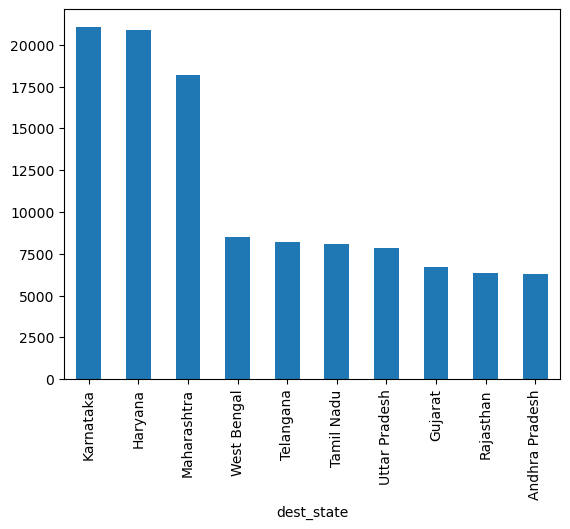

In [251]:
x=dd.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
x
plt.show()

# most  of the deliveries are from?

<Axes: xlabel='source_state'>

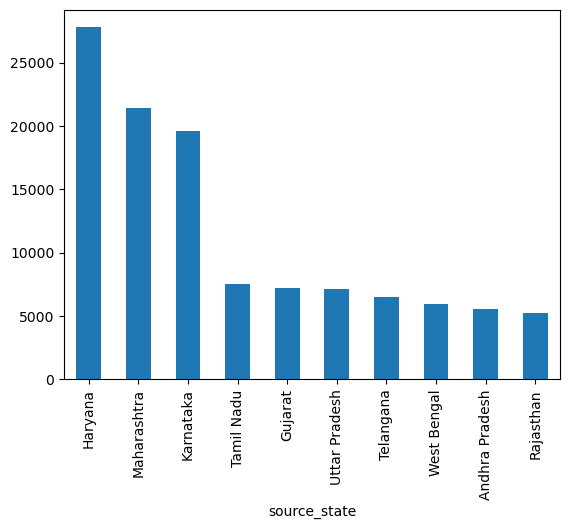

In [253]:
dd.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')

# which place has most no.of deliveries

<Axes: xlabel='dest_place'>

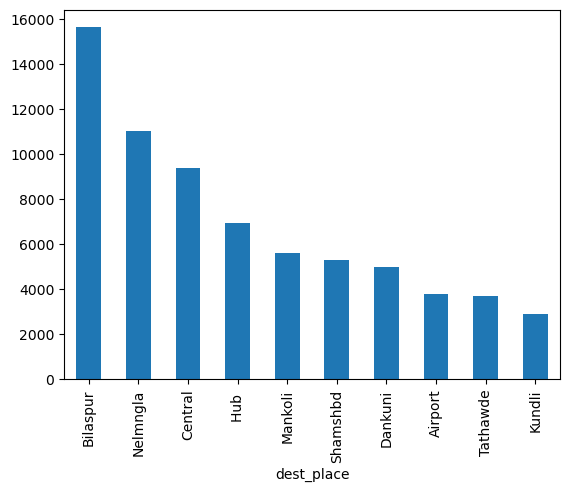

In [255]:
dd.groupby('dest_place')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')


# Which month procced more trip

<Axes: xlabel='trip_creation_month', ylabel='count'>

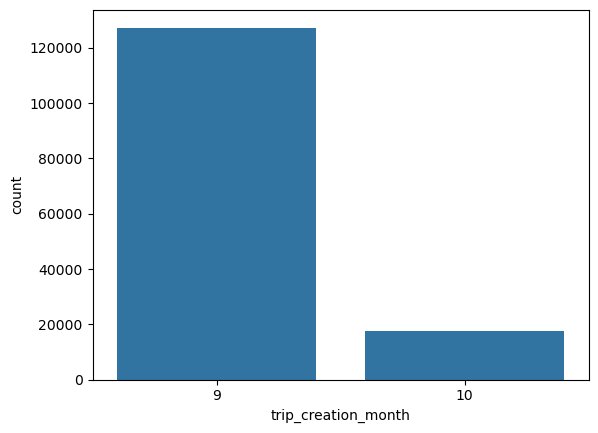

In [257]:
sns.countplot(x='trip_creation_month',data=dd)

In [258]:
# Which route type use more time to reach destination

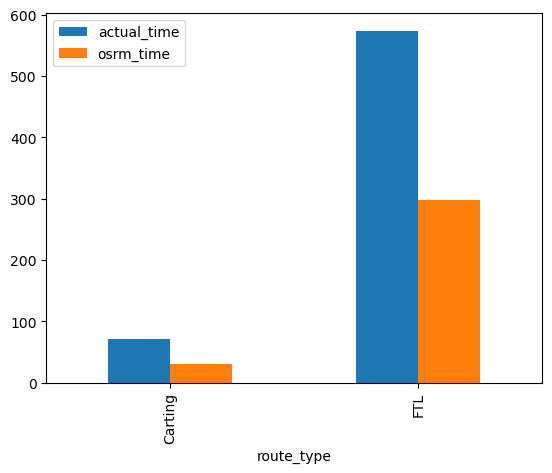

In [259]:
dd.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

In [260]:
dd['weekday']=dd['trip_creation_time'].dt.day_name()
dd

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144863,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144864,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144865,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday


In [261]:
# weekday with most delivery of the product

In [262]:
x=dd['weekday'].value_counts().to_frame('count').reset_index()
x

,weekday,count
0,Wednesday,26732
1,Thursday,20481
2,Friday,20242
3,Tuesday,19961
4,Saturday,19936
5,Monday,19645
6,Sunday,17870


[]

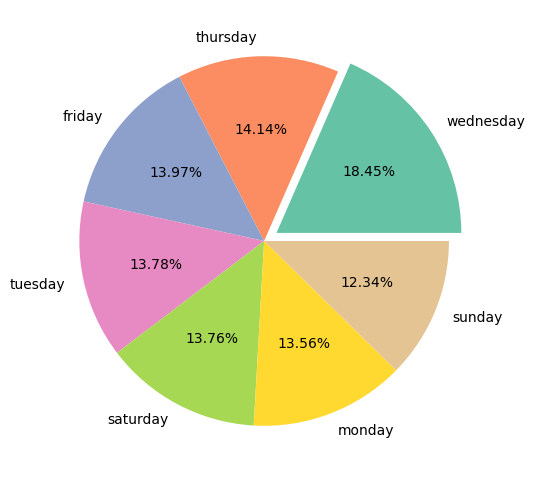

In [263]:
plt.figure(figsize=(8,6))
palette_color=sns.color_palette('Set2')
plt.pie(data=x, x=x['count'],colors=palette_color, labels=['wednesday','thursday','friday','tuesday','saturday','monday','sunday'],explode=(0.08,0,0,0,0,0,0),autopct='%0.2f%%')
plt.plot()

In [264]:
# relation ship b/n actual time and estimate time
x1=dd.groupby('source_state').aggregate({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1

,source_state,actual_time,osrm_time
0,Andhra Pradesh,142.610760,75.641813
1,Arunachal Pradesh,139.085714,52.636735
2,Assam,781.775652,308.989565
3,Bihar,372.885203,165.985203
4,Chandigarh,49.189349,24.877712
5,Chhattisgarh,96.362445,55.847162
6,Dadra and Nagar Haveli,37.733333,12.833333
7,Delhi,317.314461,153.004548
8,Goa,242.322957,133.116732
9,Gujarat,305.663288,167.288670


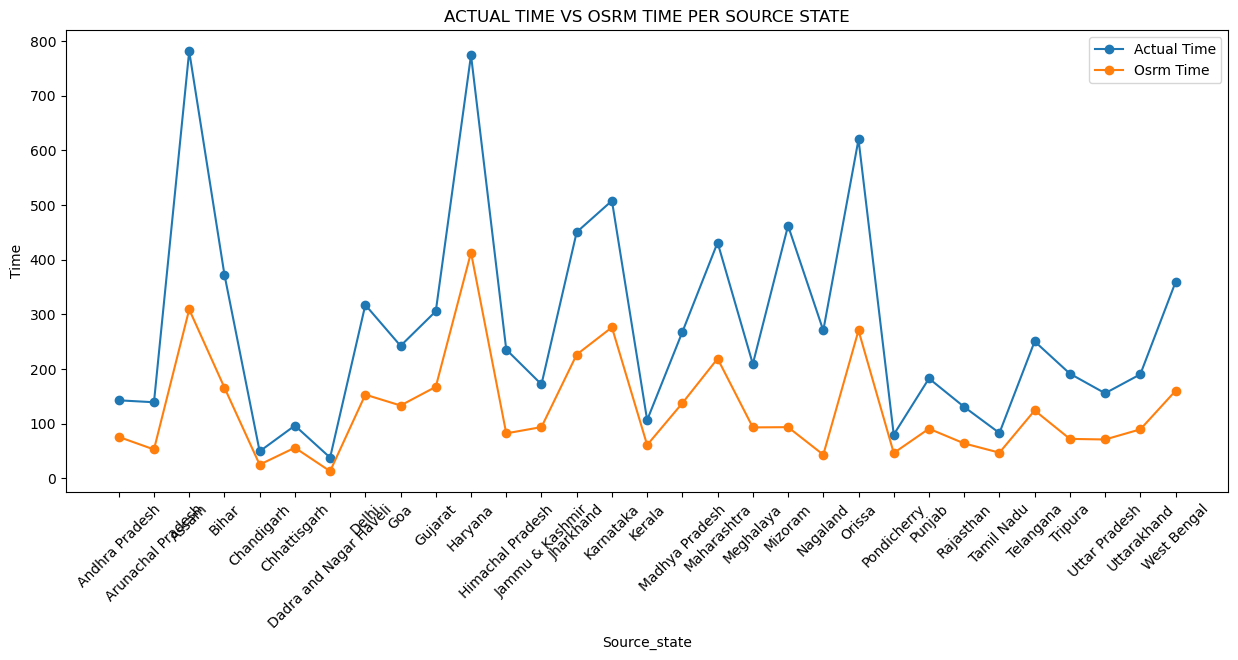

In [265]:
plt.figure(figsize=(15,6))
plt.plot(x1['source_state'],x1['actual_time'],marker='o',label='Actual Time')
plt.plot(x1['source_state'],x1['osrm_time'],marker='o',label='Osrm Time')
plt.xlabel('Source_state')
plt.xticks(rotation=45)
plt.ylabel('Time')
plt.title('ACTUAL TIME VS OSRM TIME PER SOURCE STATE')
plt.legend()
plt.show()

In [266]:
# realation b/n actual distance vs osrm distance

In [267]:
x2=dd.groupby('source_state').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x2

,source_state,actual_distance_to_destination,osrm_distance
0,Andhra Pradesh,81.114747,98.134739
1,Arunachal Pradesh,45.982993,70.472873
2,Assam,337.118676,417.997505
3,Bihar,192.910490,222.764954
4,Chandigarh,21.319882,25.762804
5,Chhattisgarh,45.677254,66.647086
6,Dadra and Nagar Haveli,12.039193,15.712160
7,Delhi,165.410528,199.556067
8,Goa,132.588648,159.187188
9,Gujarat,188.994613,222.897992


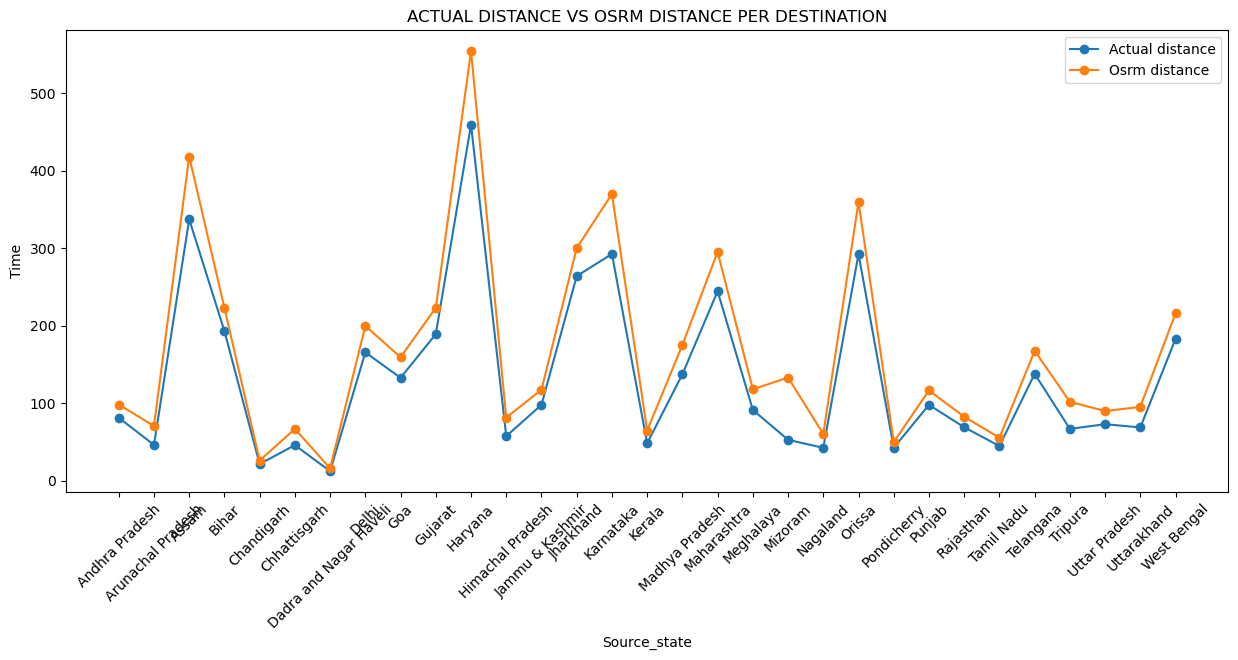

In [268]:
plt.figure(figsize=(15,6))
plt.plot(x2['source_state'],x2['actual_distance_to_destination'],marker='o',label='Actual distance')
plt.plot(x2['source_state'],x2['osrm_distance'],marker='o',label='Osrm distance')
plt.xlabel('Source_state')
plt.xticks(rotation=45)
plt.ylabel('Time')
plt.title('ACTUAL DISTANCE VS OSRM DISTANCE PER DESTINATION')
plt.legend()
plt.show()

In [269]:
# find outliers in numerical variables
num=dd.select_dtypes(include=['number'])
num.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day
0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,2018,9,20
1,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,2018,9,20
2,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,2018,9,20
3,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,2018,9,20
4,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,2018,9,20


In [270]:
num.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.0,144867.000000,144867.000000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902,2018.0,9.120925,18.389723
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066,0.0,0.326041,7.878764
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000,2018.0,9.000000,1.000000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010,2018.0,9.000000,14.000000
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300,2018.0,9.000000,19.000000
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325,2018.0,9.000000,25.000000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370,2018.0,10.000000,30.000000


In [271]:
att=[num.columns]
att

[Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
        'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
        'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year',
        'trip_creation_month', 'trip_creation_day'],
       dtype='object')]

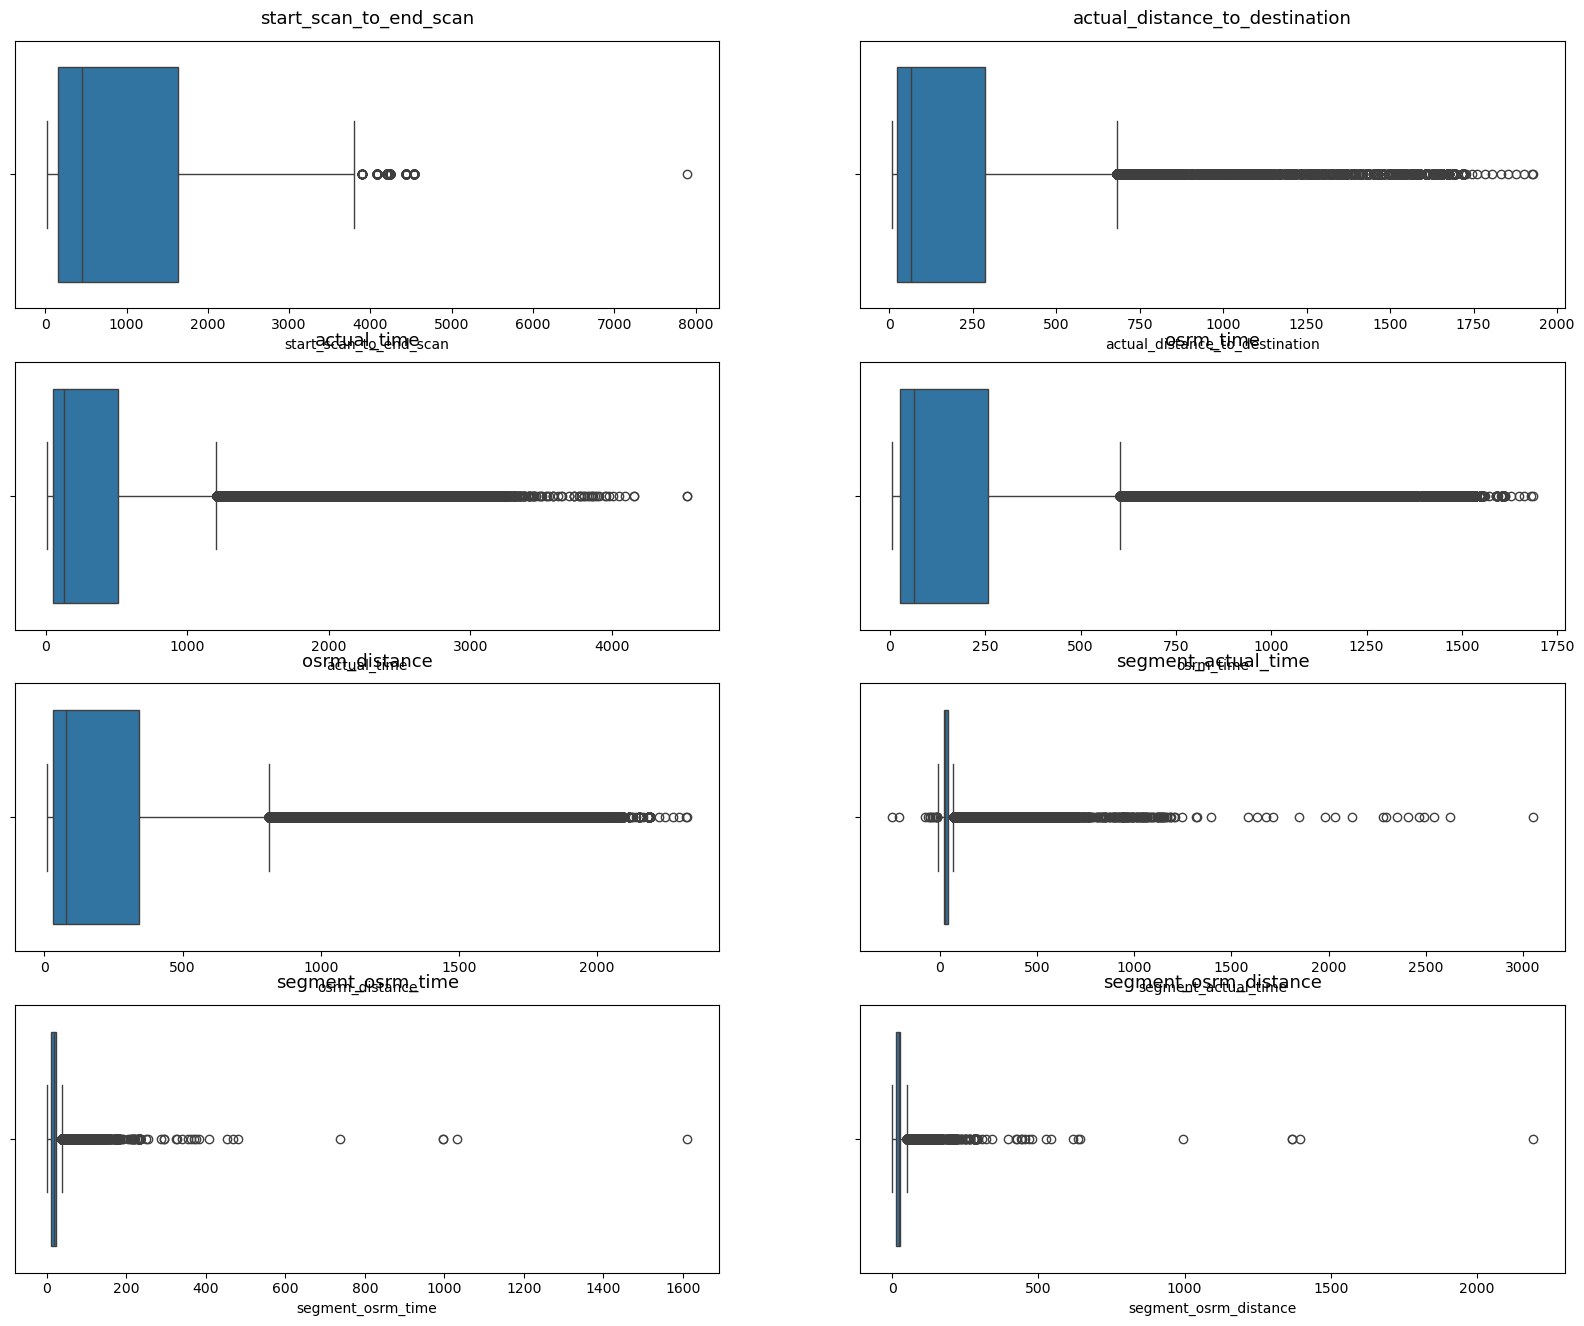

In [272]:
att=['start_scan_to_end_scan', 'actual_distance_to_destination',
        'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
        'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year',
        'trip_creation_month', 'trip_creation_day']
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(20,16))
count=0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=num,x=att[count], ax=axs[row,col])
        axs[row,col].set_title(f"{att[count]}",pad=12, fontsize=13)
        count+=1
plt.show()
        
       

In [276]:
da = dd.copy()
da.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday


In [278]:
att=['start_scan_to_end_scan', 'actual_distance_to_destination',
        'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
        'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year',
        'trip_creation_month', 'trip_creation_day']
print(att)

['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year', 'trip_creation_month', 'trip_creation_day']


In [280]:
for i in att:
    q1=da[i].quantile(.25)
    q3=da[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of ',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]

lower limit of  start_scan_to_end_scan = -2048.5
upper limit of start_scan_to_end_scan = 3843.5
------------------------------
lower limit of  actual_distance_to_destination = -371.27176693600586
upper limit of actual_distance_to_destination = 681.0150207887134
------------------------------
lower limit of  actual_time = -320.0
upper limit of actual_time = 656.0
------------------------------
lower limit of  osrm_time = -91.0
upper limit of osrm_time = 213.0
------------------------------
lower limit of  osrm_distance = -79.44758750000001
upper limit of osrm_distance = 199.40151250000002
------------------------------
lower limit of  segment_actual_time = -19.5
upper limit of segment_actual_time = 72.5
------------------------------
lower limit of  segment_osrm_time = -10.0
upper limit of segment_osrm_time = 38.0
------------------------------
lower limit of  segment_osrm_distance = -12.093824999999999
upper limit of segment_osrm_distance = 47.058975
------------------------------
lowe

In [282]:
da

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,37.406091,81.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144862,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144863,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday
144864,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,...,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,9,20,Thursday


In [284]:
da.shape

(77665, 28)

# convert categorical data into numerical format

# 1. label encoding

In [292]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
da['route_type']=label.fit_transform(da['route_type'])
da.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
1,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
2,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
3,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday
4,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,9,20,Thursday


In [294]:
da['route_type'].value_counts()

route_type
1    40185
0    37480
Name: count, dtype: int64

# 2.one-hot encoding

In [299]:
db=da.copy()

In [309]:
db['trip_creation_month'].value_counts()

trip_creation_month
9    77665
Name: count, dtype: int64

In [303]:
# perform the 2.
one_hot=pd.get_dummies(db['trip_creation_month'],prefix='month')
one_hot

,month_9
0,True
1,True
2,True
3,True
4,True
...,...
144861,True
144862,True
144863,True
144864,True


In [311]:
# concatination one_hot encode columns to orginal dataframe
db=pd.concat([db,one_hot],axis=1)
# drop
db.drop('trip_creation_month',axis=1,inplace=True)
db.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_day,weekday,month_9
0,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True
1,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True
2,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True
3,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True
4,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True


In [315]:
db['weekday'].value_counts()

weekday
Thursday     12734
Wednesday    12513
Friday       12446
Saturday     12191
Sunday       10488
Tuesday       8944
Monday        8349
Name: count, dtype: int64

In [317]:
db['week_no']=db['weekday'].map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
db.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_day,weekday,month_9,week_no
0,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,...,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True,4
1,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,...,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True,4
2,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,...,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True,4
3,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,...,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True,4
4,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,...,D,Gujarat,Anand,VUNagar,DC,2018,20,Thursday,True,4


In [319]:
db.drop(['weekday','od_start_time','od_end_time'],axis=1,inplace=True)
db.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_day,month_9,week_no
0,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
1,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
2,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
3,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
4,2018-09-20 02:35:36.476840,0,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4


In [323]:
db.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'destination_center', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'destination', 'dest_state', 'dest_city',
       'dest_place', 'dest_code', 'source_state', 'name', 'source_place',
       'source_code', 'trip_creation_year', 'trip_creation_day', 'month_9',
       'week_no'],
      dtype='object')

In [328]:
!pip install category_encoders

In [332]:
from category_encoders import TargetEncoder

In [334]:
col=['trip_uuid','source_center','destination_center']
te=TargetEncoder()
for i in col:
    db[i]=te.fit_transform(db[i],db['segment_actual_time'])

In [336]:
db.head()

,trip_creation_time,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,dest_place,dest_code,source_state,name,source_place,source_code,trip_creation_year,trip_creation_day,month_9,week_no
0,2018-09-20 02:35:36.476840,0,23.721415,15.335949,15.335949,86.0,10.435660,14.0,11.0,11.9653,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
1,2018-09-20 02:35:36.476840,0,23.721415,15.335949,15.335949,86.0,18.936842,24.0,20.0,21.7243,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
2,2018-09-20 02:35:36.476840,0,23.721415,15.335949,15.335949,86.0,27.637279,40.0,28.0,32.5395,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
3,2018-09-20 02:35:36.476840,0,23.721415,15.335949,15.335949,86.0,36.118028,62.0,40.0,45.5620,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
4,2018-09-20 02:35:36.476840,0,23.721415,15.335949,15.335949,86.0,39.386040,68.0,44.0,54.2181,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,20,True,4
